### 참고 사이트

+ http://matplotlib.org
+ http://seaborn.pydata.org

## 1. 기본 그래프(basic plot)

막대(bar), 선(line), 산포도(산점도, scatter plot), 히스토그램, 상자(box)

### (1) 질적 데이터

+ 요약방법 : 도표
+ 정리방법 : 도수 분포표, 분할표
+ 그래프 : 막대, 원, ...


### (2) 양적 데이터

+ 요약방법 : 수치
+ 정리방법 : 산술평균, 중앙값, ..
+ 그래프 : 히스토그램, 선(시계열 데이터), 산포도, Boxplot, ...

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글처리
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 음수 - 표시 처리
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

## 2. 선 그래프

0     0.334436
10    0.770667
20   -0.208299
30    2.692606
40   -0.947558
50   -0.262491
60    1.760669
70    1.234431
80   -0.029354
90   -1.129733
dtype: float64


<AxesSubplot:>

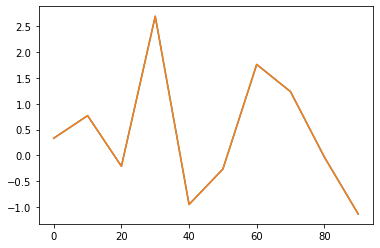

In [7]:
s = pd.Series(np.random.randn(10), index=np.arange(0, 100, 10))
print(s)

s.plot()
s.plot.line()

<AxesSubplot:>

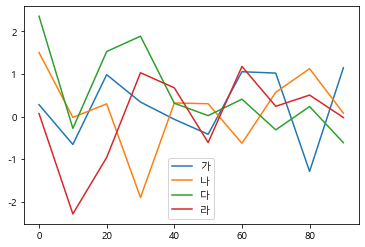

In [15]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["가", "나", "다", "라"], index=np.arange(0, 100, 10))
df.plot()

## 3. 막대 그래프

<AxesSubplot:>

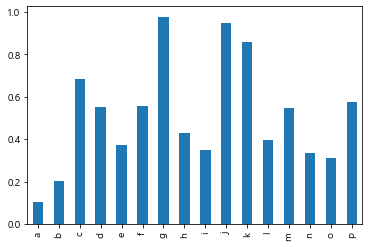

In [20]:
s = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))
s

s.plot(kind="bar")
s.plot.bar()

<AxesSubplot:>

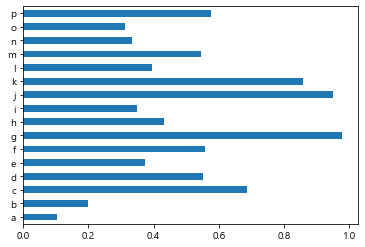

In [23]:
# 가로로 보기
s.plot(kind="barh")
s.plot.barh()

<AxesSubplot:>

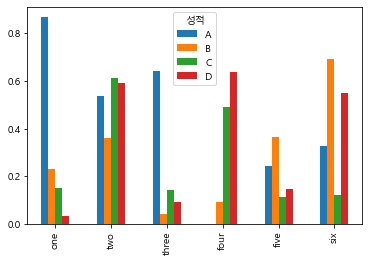

In [29]:
df = pd.DataFrame(np.random.rand(6,4), index=["one", "two", "three", "four", "five", "six"],
                 columns=pd.Index(["A", "B", "C", "D"], name="성적"))
df.plot(kind="bar")

<AxesSubplot:>

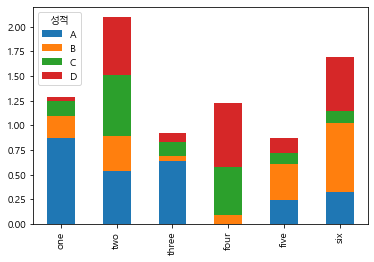

In [32]:
df.plot(kind="bar", stacked=True)

<AxesSubplot:>

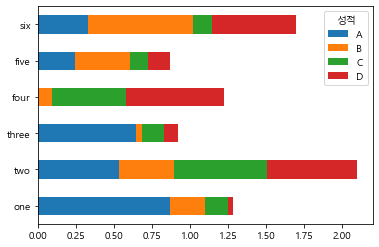

In [33]:
df.plot(kind="barh", stacked=True)

## 4. histogram

+ 값만 필요하고 인덱스는 필요없다.
+ 숫자 형태의 데이터값을 범주형 변수로 활용할 때 사용

<AxesSubplot:>

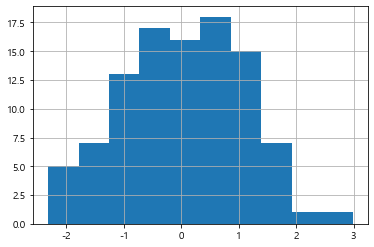

In [36]:
s = pd.Series(np.random.normal(0, 1, size=100))
s

s.hist()

<AxesSubplot:>

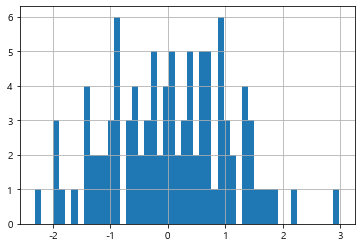

In [37]:
# bins 는 가로 x축 칸 수.  즉, 막대 수

s.hist(bins=50)

## 5. 산점도(산포도, scatter plot)

+ 두 변수의 관계를 확인

<AxesSubplot:xlabel='x1', ylabel='x2'>

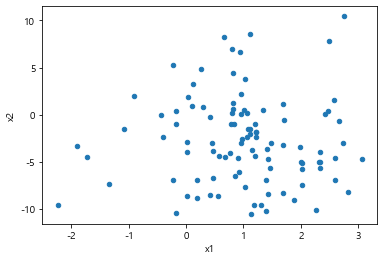

In [43]:
x1 = np.random.normal(1, 1, size=(100, 1))
x1

x2 = np.random.normal(-2, 4, size=(100, 1))
x2

# 입력값이 2개라고 가정
x = np.concatenate((x1, x2), axis=1)
x[:5]

df = pd.DataFrame(x, columns=["x1", "x2"])
df

df.plot.scatter("x1", "x2")

## 상자 그래프(box plot)

+ five-number summary
    - 최소값, 최대값, 1사분위, 2사분위, 3사분위

<AxesSubplot:>

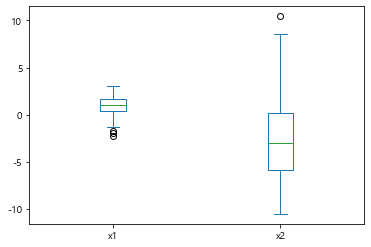

In [44]:
df.plot.box()

## 7. 활용 예제

+ tips 샘플

In [48]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0, 0.5, 'Total Bill')

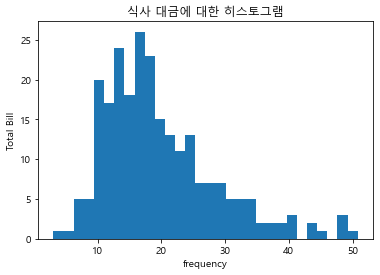

In [63]:
##### total_bill 에 대한 금액에 대해서 분포 확인

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)     #1행 1열에 1개를 그리겠다는 의미 = 기본값, 생략가능

ax.hist(tips["total_bill"], bins=30)
ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

Text(0, 0.5, 'Tip')

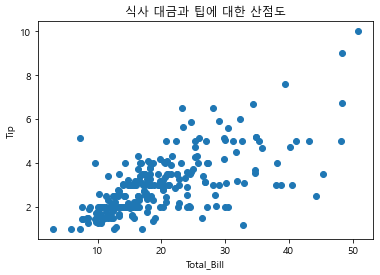

In [67]:
##### total_bill 과 tip의 관계를 알고 싶다.  -> 두 변수의 관계는 산포도라는 점 !

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips.tip)
ax.set_title("식사 대금과 팁에 대한 산점도")
ax.set_xlabel("Total_Bill")
ax.set_ylabel("Tip")

{'whiskers': [<matplotlib.lines.Line2D at 0x2779f10d460>,
 'caps': [<matplotlib.lines.Line2D at 0x2779f10da00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2779f10d190>,
 'medians': [<matplotlib.lines.Line2D at 0x2779f10dfa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2779ea002b0>,
 'means': []}

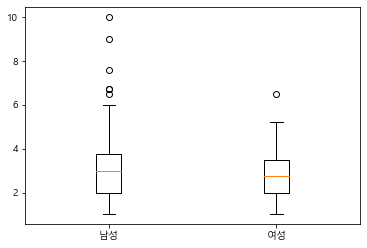

In [70]:
##### 성별과 팁의 상관관계 - 여기서 성별이 남, 여로 나뉘므로 팁과 2개의 변수라고 볼 수 없다. Box 그래프를 사용

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.boxplot([tips[tips["sex"]=="Male"]["tip"] ,
            tips[tips["sex"]=="Female"]["tip"]], labels=["남성", "여성"])

# 결과를 보면 남성이 편차가 크고 기본적으로 주는 금액은 남성, 여성 비슷하다. (남성이 이상치가 많다. - 그래프상 o 모양)

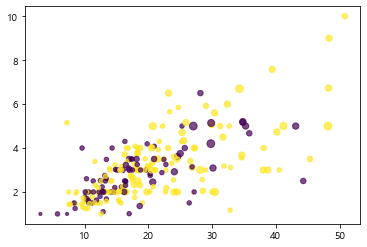

In [74]:
##### 성별에 따른 total_bill 과 tip의 관계를 알고 싶다.

def record_sex(sex):
    if sex == "Female":
        return 0
    else:
        return 1
    
tips["sex_color"] = tips["sex"].apply(record_sex)
tips.head(10)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips["tip"], c=tips["sex_color"], alpha=0.7, s=tips["size"]*10)    
# c는 색상(물론 랜덤), alpha는 투명도 지정, s는 사이즈 - 점의 크기가 커지고 작고